<a href="https://colab.research.google.com/github/YunHoLeee/Manhwa_Research_In_Korea/blob/main/MRIC_basic%20statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 기본 패키지 설치

In [ ]:
# # 나눔고딕 설치
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# 패키지 설치
!pip install -U tomotopy gdown -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 5.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
tqdm.pandas()

# import matplotlib.pyplot as plt
# import matplotlib as mpl
# # 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
# mpl.rcParams['axes.unicode_minus'] = False
# plt.rc('font', family='NanumBarunGothic')
# font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# import matplotlib.colors as clr

from collections import Counter
import regex
import re

# from kiwipiepy import Kiwi
# kiwi = Kiwi(model_type='sbg')

# from flashtext import KeywordProcessor
# kp = KeywordProcessor()

import tomotopy as tp
# print(tp.isa)
import sys
from sklearn import preprocessing

import itertools
from collections import defaultdict
import pickle

import nltk
from nltk import collocations
from gensim.test.utils import common_texts
# from gensim.models import Word2Vec
# from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import gdown
import ast

Selecting previously unselected package fonts-nanum.
(Reading database ... 121913 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


<Figure size 500x500 with 0 Axes>

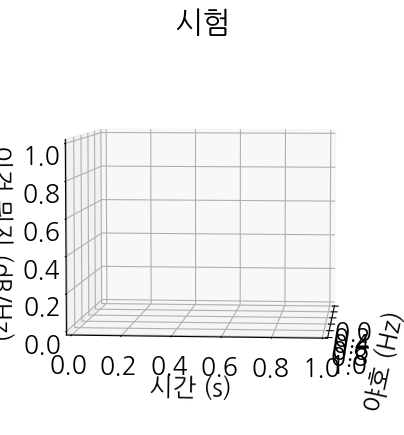

In [ ]:
# 시각화 필요 라이브러리 불러오기
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

# 테스트 해보기
fig = plt.figure(figsize=(5, 5))
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(5, 5))

graph_title = '시험'
ax.set_title(f'{graph_title}')
ax.set_xlabel('야호 (Hz)', labelpad=10)
ax.set_ylabel('시간 (s)', labelpad=10)
ax.set_zlabel('이건 뭐지 (dB/Hz)', labelpad=10)

ax.view_init(5, 5)
plt.show()

### 자료 가져오기

In [ ]:
# 내 연구 대상 논문 데이터(엑셀) load
# https://docs.google.com/spreadsheets/d/16OcnCtUPvVImDCHtzYQUSdJ4_UHxeUVwKBCO5j2jLI8/edit?usp=sharing
gdown.download(id='16OcnCtUPvVImDCHtzYQUSdJ4_UHxeUVwKBCO5j2jLI8',output='webtoon.xlsx')
df = pd.read_excel('./webtoon.xlsx')

FileURLRetrievalError: Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=16OcnCtUPvVImDCHtzYQUSdJ4_UHxeUVwKBCO5j2jLI8

but Gdown can't. Please check connections and permissions.

In [ ]:
df = pd.read_excel('./webtoon.xlsx') # 나중에 실습할때 여기에 여러분이 다운로드 받은 파일 이름으로 변경할 것.
df

### 대분류 테이블

In [ ]:
import pandas as pd
import gspread
from gspread_dataframe import get_as_dataframe
from google.colab import auth
from google.auth import default

# 사용자 인증
auth.authenticate_user()
creds, _ = default()

# Google 스프레드시트 서비스 시작
gc = gspread.authorize(creds)

# 스프레드시트 열기
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/1VrIaWrdrJMlFDTPl8BkhF4U7CHzWwCV0WFpceRujC1w/edit?gid=387292444'
spreadsheet = gc.open_by_url(spreadsheet_url)

# 첫 번째 워크시트 가져오기
worksheet = spreadsheet.get_worksheet(0)

# 데이터를 pandas 데이터프레임으로 변환
df = get_as_dataframe(worksheet)

# 필요한 열 선택 및 결측치 제거
df = df[['대분류', '중분류']].dropna()

# 주제 별 게재 논문 수 계산
subject_papers = df.groupby(['대분류', '중분류']).size().reset_index(name='논문 수')

# 데이터프레임을 엑셀 파일로 저장
subject_papers.to_excel('/content/subject_papers.xlsx', index=False)

# Google Colab에서 파일 다운로드
from google.colab import files
files.download('/content/subject_papers.xlsx')

subject_papers.head()  # 데이터프레임 확인 (옵션)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,대분류,중분류,논문 수
0,공학,경영학,1
1,공학,공학일반,7
2,공학,산업공학,6
3,공학,전자/정보통신공학,7
4,공학,정보 없음,2


In [ ]:
import pandas as pd
import gspread
from gspread_dataframe import get_as_dataframe
from google.colab import auth
from google.auth import default
import matplotlib.pyplot as plt

# 사용자 인증
auth.authenticate_user()
creds, _ = default()

# Google 스프레드시트 서비스 시작
gc = gspread.authorize(creds)

# 스프레드시트 열기
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/1VrIaWrdrJMlFDTPl8BkhF4U7CHzWwCV0WFpceRujC1w/edit?gid=387292444'
spreadsheet = gc.open_by_url(spreadsheet_url)

# 첫 번째 워크시트 가져오기
worksheet = spreadsheet.get_worksheet(0)

# 데이터를 pandas 데이터프레임으로 변환
df = get_as_dataframe(worksheet)

# 필요한 열 선택 및 결측치 제거
df = df[['발행연도', '학술지명']].dropna()

# 발행연도 형식 확인
print(df['발행연도'].unique())

# 발행연도를 datetime 형식으로 변환하고 연도만 추출
df['발행연도'] = pd.to_numeric(df['발행연도'], errors='coerce')

# 데이터프레임 확인
print(df.head())
print(df['발행연도'].unique())


[2023 2022 2019 2018 2017 2016 2015 2021 2014 2012 2020 2013 2011 2010
 2009 2008 2007 2006 2004 2003]
   발행연도                   학술지명
0  2023  Korea Business Review
1  2023                  상품학연구
2  2023                 청람어문교육
3  2023             일러스트레이션 포럼
4  2023                 신학과 실천
[2023 2022 2019 2018 2017 2016 2015 2021 2014 2012 2020 2013 2011 2010
 2009 2008 2007 2006 2004 2003]


In [ ]:
# 유효한 발행연도 필터링 (예: 2003-2023)
df = df[(df['발행연도'] >= 2003) & (df['발행연도'] <= 2023)]

# 시기 구분 추가
def classify_period(year):
    if 2003 <= year <= 2010:
        return '시기 1'
    elif 2011 <= year <= 2013:
        return '시기 2'
    elif 2014 <= year <= 2021:
        return '시기 3'
    elif 2022 <= year <= 2023:
        return '시기 4'

df['시기 구분'] = df['발행연도'].apply(classify_period)

# 발행연도별 논문 수 계산
yearly_counts = df.groupby(['시기 구분', '발행연도']).size().reset_index(name='논문 수')

# 데이터프레임 확인
print(yearly_counts)

# 데이터프레임을 엑셀 파일로 저장
yearly_counts.to_excel('/content/yearly_counts.xlsx', index=False)

# Google Colab에서 파일 다운로드
from google.colab import files
files.download('/content/yearly_counts.xlsx')


   시기 구분  발행연도  논문 수
0   시기 1  2003     1
1   시기 1  2004     1
2   시기 1  2006     1
3   시기 1  2007     5
4   시기 1  2008     2
5   시기 1  2009     6
6   시기 1  2010     7
7   시기 2  2011    14
8   시기 2  2012    13
9   시기 2  2013    12
10  시기 3  2014    29
11  시기 3  2015    50
12  시기 3  2016    41
13  시기 3  2017    49
14  시기 3  2018    61
15  시기 3  2019    64
16  시기 3  2020    59
17  시기 3  2021    67
18  시기 4  2022    87
19  시기 4  2023   101


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

# Set default font to avoid font issues
plt.rcParams['font.family'] = 'DejaVu Sans'

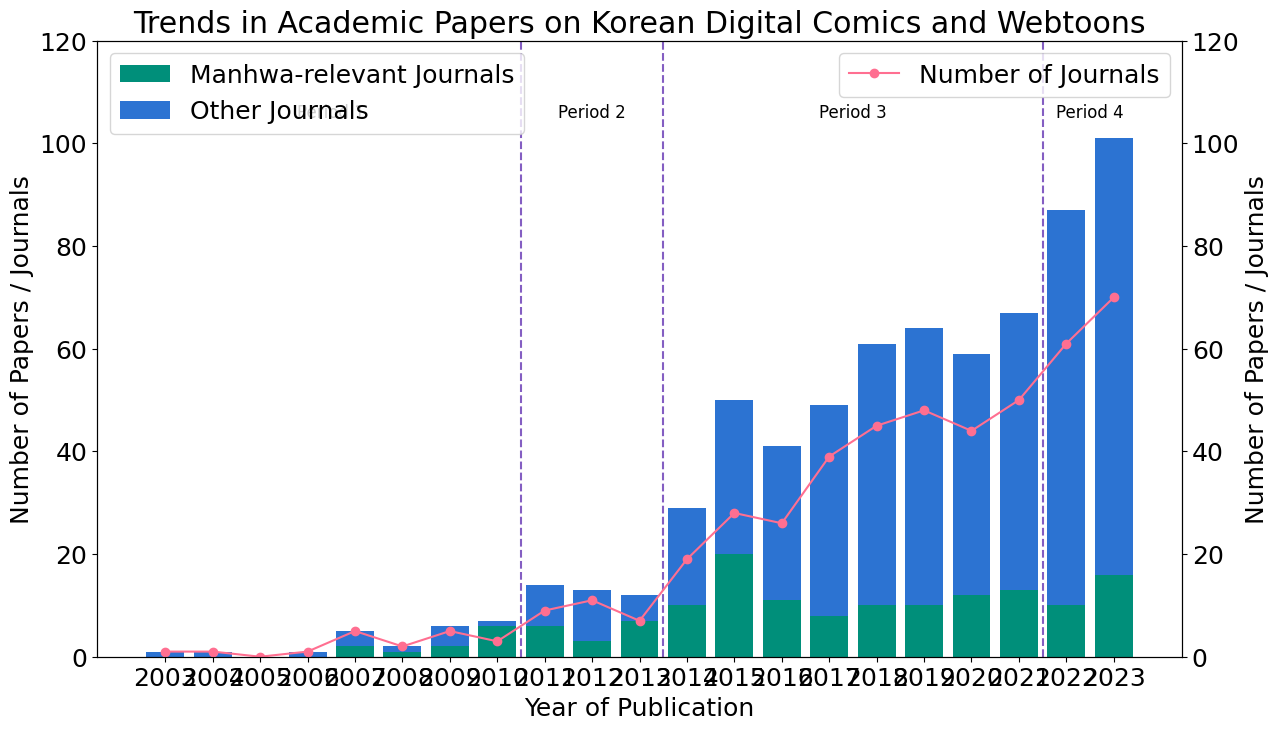

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '웹툰연구사 정리 데이터 최종(~2023) (2).xlsx'
data = pd.read_excel(file_path, sheet_name='서지정보')

# Define the function to classify periods
def period_classification(year):
    if 2003 <= year <= 2010:
        return 'Period 1'
    elif 2011 <= year <= 2013:
        return 'Period 2'
    elif 2014 <= year <= 2021:
        return 'Period 3'
    elif 2022 <= year <= 2023:
        return 'Period 4'
    else:
        return None

# Add a new column for period classification
data['Period'] = data['발행연도'].apply(period_classification)

# Define the list of years and journals
years = list(range(2003, 2024))
journals = ['만화애니메이션연구', '애니메이션연구', '만화웹툰연구']

# Define the function to categorize journals
def journal_category(row):
    if row in journals:
        return 'Manhwa-relevant Journals'
    else:
        return 'Other Journals'

# Add a new column for journal categorization
data['Journal Category'] = data['학술지명'].apply(journal_category)

# Group and reindex the data for plotting
categorized_data = data.groupby(['발행연도', 'Journal Category']).size().unstack(fill_value=0).reindex(years, fill_value=0)
journal_counts = data.groupby('발행연도')['학술지명'].nunique().reindex(years, fill_value=0)

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot
bar_width = 0.8
p1 = ax1.bar(categorized_data.index, categorized_data['Manhwa-relevant Journals'], bar_width, color='#008F7A', label='Manhwa-relevant Journals')
p2 = ax1.bar(categorized_data.index, categorized_data['Other Journals'], bar_width, bottom=categorized_data['Manhwa-relevant Journals'], color='#2C73D2', label='Other Journals')

# Line plot
ax2 = ax1.twinx()
line = ax2.plot(journal_counts.index, journal_counts, color='#FF6F91', marker='o', label='Number of Journals')

# Adding period separators and text
periods = {
    'Period 1': (2003, 2010),
    'Period 2': (2011, 2013),
    'Period 3': (2014, 2021),
    'Period 4': (2022, 2023)
}
for period, (start, end) in periods.items():
    if start != 2003:
        ax1.axvline(x=start-0.5, color='#845EC2', linestyle='--')
    ax1.text((start + end) / 2, 105, period, horizontalalignment='center', fontsize=12, color='black')

# Customizing the plot
ax1.set_xlabel('Year of Publication')
ax1.set_ylabel('Number of Papers / Journals')
ax2.set_ylabel('Number of Papers / Journals')
ax1.set_title('Trends in Academic Papers on Korean Digital Comics and Webtoons')
ax1.set_xticks(years)
ax1.set_ylim(0, 120)
ax2.set_ylim(0, 120)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


In [ ]:

# Set default font to avoid font issues
plt.rcParams['font.family'] = 'DejaVu Sans'

<ipython-input-29-5b3db871effb>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['대분류_영어'] = filtered_data['대분류'].map(category_mapping)


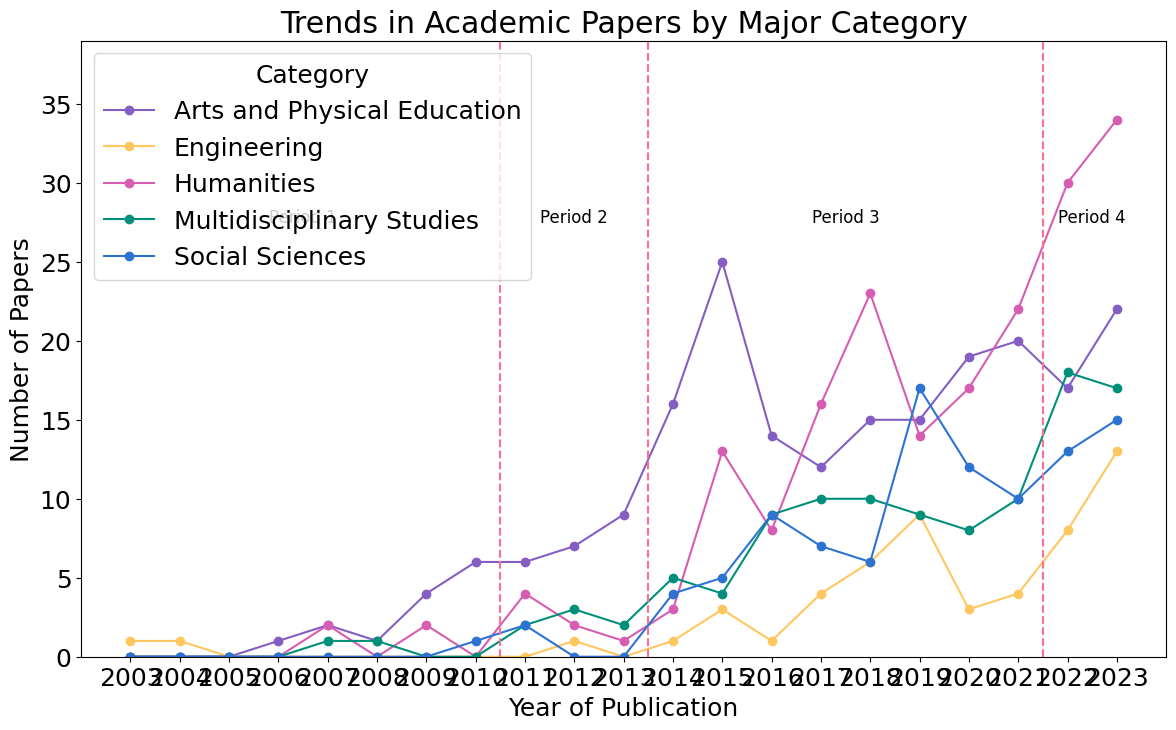

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '웹툰연구사 정리 데이터 최종(~2023) (2).xlsx'
data = pd.read_excel(file_path, sheet_name='서지정보')

# Define the list of years
years = list(range(2003, 2024))

# Filter the data to exclude '의약학' and '자연과학'
filtered_data = data[~data['대분류'].isin(['의약학', '자연과학'])]

# Mapping the '대분류' to English
category_mapping = {
    '공학': 'Engineering',
    '복합학': 'Multidisciplinary Studies',
    '사회과학': 'Social Sciences',
    '예술체육학': 'Arts and Physical Education',
    '인문학': 'Humanities'
}

filtered_data['대분류_영어'] = filtered_data['대분류'].map(category_mapping)

# Group the data by '발행연도' and '대분류_영어'
category_data_eng = filtered_data.groupby(['발행연도', '대분류_영어']).size().unstack(fill_value=0).reindex(years, fill_value=0)

# Define colors for each category
new_colors = {
    'Humanities': '#D65DB1', # Custom Pink
    'Social Sciences': '#2C73D2', # Custom Blue
    'Arts and Physical Education': '#845EC2', # Custom Purple
    'Engineering': '#FFC75F', # Custom Yellow
    'Multidisciplinary Studies': '#008F7A' # Custom Green
}

# Re-creating the plot with updated requirements including period separators and new colors
fig, ax1 = plt.subplots(figsize=(14, 8))

# Line plot for each category
for category in category_data_eng.columns:
    ax1.plot(category_data_eng.index, category_data_eng[category], marker='o', label=category, color=new_colors[category])

# Adding period separators and text
periods = {
    'Period 1': (2003, 2010),
    'Period 2': (2011, 2013),
    'Period 3': (2014, 2021),
    'Period 4': (2022, 2023)
}
for period, (start, end) in periods.items():
    if start != 2003:
        ax1.axvline(x=start-0.5, color='#FF6F91', linestyle='--')
    ax1.text((start + end) / 2, 27.5, period, horizontalalignment='center', fontsize=12, color='black')

# Customizing the plot
ax1.set_xlabel('Year of Publication')
ax1.set_ylabel('Number of Papers')
ax1.set_title('Trends in Academic Papers by Major Category')
ax1.set_xticks(years)
ax1.set_ylim(0, category_data_eng.max().max() + 5)
ax1.legend(title='Category', loc='upper left')

# Save the plot as an image
plt.savefig('Trends_in_Academic_Papers_by_Major_Category_with_Periods_Final.png')

plt.show()


<ipython-input-30-ad771f8ab1a0>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['대분류_영어'] = filtered_data['대분류'].map(category_mapping)


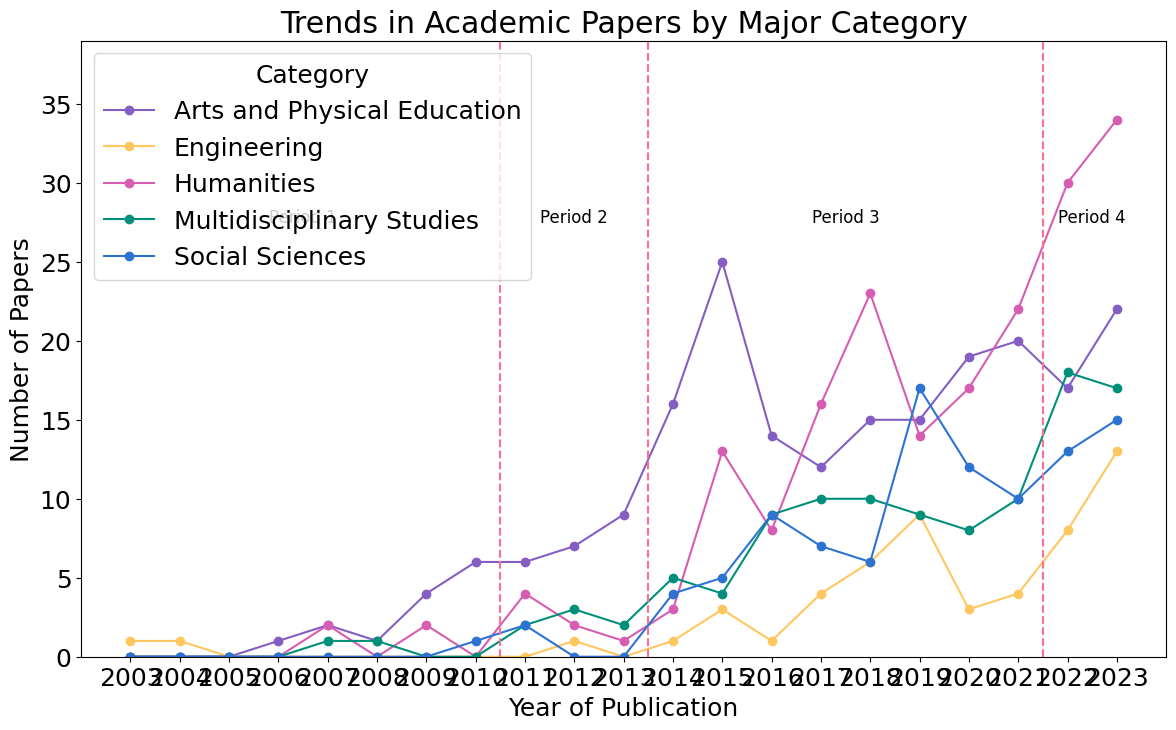

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '웹툰연구사 정리 데이터 최종(~2023) (2).xlsx'
data = pd.read_excel(file_path, sheet_name='서지정보')

# Define the list of years
years = list(range(2003, 2024))

# Filter the data to exclude '의약학' and '자연과학'
filtered_data = data[~data['대분류'].isin(['의약학', '자연과학'])]

# Mapping the '대분류' to English
category_mapping = {
    '공학': 'Engineering',
    '복합학': 'Multidisciplinary Studies',
    '사회과학': 'Social Sciences',
    '예술체육학': 'Arts and Physical Education',
    '인문학': 'Humanities'
}

filtered_data['대분류_영어'] = filtered_data['대분류'].map(category_mapping)

# Group the data by '발행연도' and '대분류_영어'
category_data_eng = filtered_data.groupby(['발행연도', '대분류_영어']).size().unstack(fill_value=0).reindex(years, fill_value=0)

# Define colors for each category
new_colors = {
    'Humanities': '#D65DB1', # Custom Pink
    'Social Sciences': '#2C73D2', # Custom Blue
    'Arts and Physical Education': '#845EC2', # Custom Purple
    'Engineering': '#FFC75F', # Custom Yellow
    'Multidisciplinary Studies': '#008F7A' # Custom Green
}

# Set default font to avoid font issues
plt.rcParams['font.family'] = 'DejaVu Sans'

# Re-creating the plot with updated requirements including period separators and new colors
fig, ax1 = plt.subplots(figsize=(14, 8))

# Line plot for each category
for category in category_data_eng.columns:
    ax1.plot(category_data_eng.index, category_data_eng[category], marker='o', label=category, color=new_colors[category])

# Adding period separators and text
periods = {
    'Period 1': (2003, 2010),
    'Period 2': (2011, 2013),
    'Period 3': (2014, 2021),
    'Period 4': (2022, 2023)
}
for period, (start, end) in periods.items():
    if start != 2003:
        ax1.axvline(x=start-0.5, color='#FF6F91', linestyle='--')
    ax1.text((start + end) / 2, 27.5, period, horizontalalignment='center', fontsize=12, color='black')

# Customizing the plot
ax1.set_xlabel('Year of Publication')
ax1.set_ylabel('Number of Papers')
ax1.set_title('Trends in Academic Papers by Major Category')
ax1.set_xticks(years)
ax1.set_ylim(0, category_data_eng.max().max() + 5)
ax1.legend(title='Category', loc='upper left')

# Save the plot as an image
plt.savefig('Trends_in_Academic_Papers_by_Major_Category_with_Periods_Final.png')

plt.show()


### 데이터 준비 및 가중치 부여

In [ ]:
# Install necessary libraries
!pip install konlpy
!pip install nltk

# Install Java Runtime Environment (required for konlpy)
!apt-get update
!apt-get install -y openjdk-8-jdk


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 48.1 MB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,183 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/restricte

In [ ]:
# Import necessary libraries
import pandas as pd
from konlpy.tag import Okt
import re

# Load the Excel file
file_path = '웹툰연구사 정리 데이터 최종(~2023) (2).xlsx'
data = pd.read_excel(file_path, sheet_name='서지정보')

# Initialize the Okt tokenizer
okt = Okt()


In [ ]:

# Add words to the Okt tokenizer's user dictionary
custom_words = ['디지털 플랫폼 기업', 'M&A 전략', '경제사회적 효과']
# Note: okt.add_dictionary is not available in current konlpy version

# Define the custom stop words with variations
stop_words = [
    '웹툰',
    '웹 만화',
    '웹만화',
    '디지털 만화',
    '디지털만화',
    '웹 코믹스', '웹코믹스',
    '인터넷 만화',
    '인터넷만화',
    '온라인 만화',
    '온라인만화',
    'webtoon',
    '만화',
    '디지털',
]

In [ ]:
# Import necessary libraries
import pandas as pd
from konlpy.tag import Okt
import re

# Load the Excel file
file_path = '웹툰연구사 정리 데이터 최종(~2023) (2).xlsx'
data = pd.read_excel(file_path, sheet_name='서지정보')

# Initialize the Okt tokenizer
okt = Okt()

# Define the custom stop words with variations
stop_words = [
    '웹툰', '웹 만화', '웹만화', '디지털 만화', '디지털만화', '웹 코믹스', '웹코믹스',
    '인터넷 만화', '인터넷만화', '온라인 만화', '온라인만화', 'webtoon', '만화'
]

# Function to replace custom words in text
def replace_custom_words(text, custom_words):
    if isinstance(text, float):
        return ""
    for word in custom_words:
        text = text.replace(word, word.replace(' ', ''))
    return text

# Function to clean text and extract nouns
def extract_nouns(text):
    text = replace_custom_words(text, custom_words)
    text = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣A-Za-z& ]', '', text)
    nouns = okt.nouns(text)
    # Remove stop words
    nouns = [word for word in nouns if word not in stop_words]
    return nouns

# Function to split keywords
def split_keywords(keywords):
    if isinstance(keywords, float):
        return []
    tokens = keywords.split(',')
    tokens = [token.strip() for token in tokens]
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

# Post-processing function to merge split words
def merge_split_words(tokens):
    merge_candidates = {
        '리터': '러시',
        '디지털': '플랫폼',
        '무': '배경',
        '사유': '관',

        # 여기에 더 많은 단어들을 추가할 수 있습니다.
    }
    i = 0
    while i < len(tokens) - 1:
        if tokens[i] in merge_candidates and merge_candidates[tokens[i]] == tokens[i + 1]:
            tokens[i] = tokens[i] + tokens[i + 1]
            del tokens[i + 1]
        else:
            i += 1
    return tokens

# Apply the functions to extract tokens
data['title_nouns'] = data['논문명'].apply(extract_nouns).apply(merge_split_words)
data['abstract_nouns'] = data['초록'].apply(extract_nouns).apply(merge_split_words)
data['keyword_tokens'] = data['저자키워드'].apply(split_keywords)

# Combine tokens with weighting
def combine_tokens_with_weight(title_nouns, keyword_tokens, abstract_nouns, title_weight=3, keyword_weight=3):
    combined_tokens = (title_nouns * title_weight) + (keyword_tokens * keyword_weight) + abstract_nouns
    return combined_tokens

data['combined_tokens'] = data.apply(lambda row: combine_tokens_with_weight(row['title_nouns'], row['keyword_tokens'], row['abstract_nouns']), axis=1)

# Display the first few rows of the combined tokens
print(data[['발행연도', 'combined_tokens']].head())


   발행연도                                    combined_tokens
0  2023  [디지털플랫폼, 기업, 전략, 사회, 효과, 분석, 카카오, 엔터테인먼트, 사례, ...
1  2023  [한국, 플랫폼, 섬네일, 특징, 선택, 영향, 이미지, 분석, 적용, 한국, 플랫...
2  2023  [창세신화, 활용, 문화, 리터러시, 교육, 방안, 연구, 창세신화, 활용, 문화,...
3  2023  [무배경, 유발, 참여, 사유, 관, 담론, 무배경, 유발, 참여, 사유, 관, 담...
4  2023  [이용, 행위, 중독, 연구, 이용, 행위, 중독, 연구, 이용, 행위, 중독, 연...


In [ ]:
# Initial extraction and check
tokens_df = extract_and_check_tokens(data, custom_words, stop_words)
print(tokens_df.head())

# Update custom words and stop words
new_custom_words = ['사유관',
                    '이용 행위',
                    ]
new_stop_words = ['제외할 단어1', '연구']
update_custom_and_stop_words(new_custom_words, new_stop_words)

# Extract tokens and check again
tokens_df = extract_and_check_tokens(data, custom_words, stop_words)
print(tokens_df.head())

# Save the tokens to a CSV file for further inspection
tokens_df.to_csv('tokens_output.csv', index=False)
